# SSIE 500 Homework 2 (Playing with Python)
##### Grant T. Aguinaldo

In [1]:
# Imported Packages for the Project
import pandas as pd
import string
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import copy
import requests as r
import seaborn as sns
%matplotlib inline

# URL to the text file of Pride and Prejudice that was downloaded from http://www.gutenberg.org/ebooks/1342
# This code fulfills the requirements outlined in 1 of the homework instructions.
url = 'https://raw.githubusercontent.com/grantaguinaldo/mcmc/master/pride_prejudice.txt'

In [2]:
# Set of User-Defined Functions

def load_data(url):
    '''
    This function downloads a text document from a url
    and does transforms the text into a python list that
    can be loaded into a Pandas DataFrame. 
    
    This code fulfills the requirements outlined in 2(a) of the homework instructions.
    '''
    string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'
    url = url
    data = r.get(url)
    
    # This code fulfills the requirements outlined in 2(a) of the homework instructions.
    f = data.text
    print('Text File Has Been Downloaded')
    print('---')
    print('This Text File Contains: {} Characters'.format(len(f)))
    remove_bom = f.replace('\ufeff', '###')
    comma_delimit = remove_bom.replace('\n', ',').strip().lower().replace('\r', '').split(',') 
    clean_text = [each for each in comma_delimit if (str.rstrip(each) != '') or\
                  (str.rstrip(each) not in string_punctuation)]
    return pd.DataFrame({'text': clean_text})

def clean(s):
    '''
    This function takes in a string and remove punctuation, numeric values 
    and all extra spaces from string. 
    '''
    string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'
    # remove punctuation
    no_punc = s.translate(str.maketrans('', '', string_punctuation))
    # remove num
    no_num = ''.join([each for each in no_punc if not each.isdigit()])
    # remove extra spaces
    return ' '.join(no_num.split())


def count_alpha(x):
    '''
    This function takes in a string and returns the occurances of each letter 
    in the string. 
    '''
    return Counter(x)

def count(s):
    '''
    This function takes in a string and manually counts the occurances 
    of each letter in  the string. 
    '''
    count_a = s.count('a') 
    count_b = s.count('b')
    count_c = s.count('c')
    count_d = s.count('d')
    count_e = s.count('e')
    count_f = s.count('f')
    count_g = s.count('g')
    count_h = s.count('h')
    count_i = s.count('i')
    count_j = s.count('j')
    count_k = s.count('k')
    count_l = s.count('l')
    count_m = s.count('m')
    count_n = s.count('n')
    count_o = s.count('o')
    count_p = s.count('p')
    count_q = s.count('q')
    count_r = s.count('r')
    count_s = s.count('s')
    count_t = s.count('t')
    count_u = s.count('u')
    count_v = s.count('v')
    count_w = s.count('w')
    count_x = s.count('x')
    count_y = s.count('y')
    count_z = s.count('z')
    count_space = s.count(' ')
    
    return {'a': count_a, 'b': count_b, 'c': count_c, 
            'd': count_d, 'e': count_e, 'f': count_f, 
            'g': count_g, 'h': count_h, 'i': count_i, 
            'j': count_j, 'k': count_k, 'l': count_l, 
            'm': count_m, 'n': count_n, 'o': count_o,
            'p': count_p, 'q': count_q, 'r': count_r, 
            's': count_s, 't': count_t, 'u': count_u, 
            'v': count_v, 'w': count_w, 'x': count_x, 
            'y': count_y, 'z': count_z, 'space': count_space}

def markov(s):
    '''
    This is a helper function that takes in dict and returns
    the value of the argument.
    '''
    return markov_pred_dict[s]

def markov_sampler(char_init, n_iter, markov_dict):
    '''
    This function takes in a series of initial parameters
    and recursively generates a string based on the most 
    common letter transistions from the text.
    '''
    char_now = char_init
    markov_str = []
    n_iter = n_iter
    for i in range(n_iter):
        char_now = markov(char_now)
        markov_str.append(char_now)
    return ''.join(markov_str)

def generate_kgram(s, n):
    '''
    This function takes in a string and counts all of the possible
    k-grams found in  the string.
    '''
    return Counter([s[i:i+n] for i in range(0, len(s), 1)])

def graph(x, y, data, ylabel, xlabel, title):
    '''
    This is a helper function that is used to create the bar charts
    needed to show the distribution of letters in  the text. 
    '''
    sns.set(rc={'figure.figsize':(15,5)})
    sns.barplot(x=x, y=y, data=data)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylim(0, 0.180, 0.025)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=17)
    return plt.show()

idx_list = ['space', 'a', 'b', 'c', 
            'd', 'e', 'f', 'g', 'h', 
            'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 
            's', 't', 'u', 'v', 'w', 
            'x', 'y', 'z']

new_col_list = ['first_pos', ' ', 'a', 'b', 'c',
                'd', 'e', 'f', 'g', 'h', 'i',
                'j', 'k', 'l', 'm', 'n', 'o',
                'p', 'q', 'r', 's', 't', 'u',
                'v', 'w', 'x', 'y', 'z']

idx_list_2 = ['first_pos', 'a', 'b', 'c', 
            'd', 'e', 'f', 'g', 'h', 
            'i', 'j', 'k', 'l', 'm', 
            'n', 'o', 'p', 'q', 'r', 
            's', 't', 'u', 'v', 'w', 
            'x', 'y', 'z']

df = load_data(url)
df.shape

Text File Has Been Downloaded
---
This Text File Contains: 790332 Characters


(20804, 1)

In [3]:
'''
This code applies the user-defined cleaning function and 
adds the clean text to a  new Pandas column. The function 
also inserts a np.nan each time that there is a null value.
'''
df_clean = copy.deepcopy(df)
df_clean.loc[:, 'clean_string'] = df_clean['text'].apply(clean)
df_clean.replace('', np.nan, inplace=True)
df_clean.describe()

,text,clean_string
count,20804,20782
unique,18816,18197
top,and,and
freq,177,191


In [4]:
'''
This code returns all of the rows that does not have a null. 
and returns the summary statistics. 
'''
df_clean = df_clean[~df_clean['clean_string'].isna()]
df_clean.describe()

,text,clean_string
count,20782,20782
unique,18810,18197
top,and,and
freq,177,191


In [5]:
'''
This code creates a dict of all of the occurances of the string and
inserts the results into a new column using two methods. The first method
manually counts the occurances and the second uses the built in Python method 
to count the occurances. 
'''
df_clean.loc[:, 'clean_string_count'] = df_clean['clean_string'].apply(count_alpha)
df_clean.loc[:, 'clean_string_count_py'] = df_clean['clean_string'].apply(count)

'''
This code summarizes all of the counts from the list of dict and returns a 
final dict that has the final counts of letters in the body of text. 
'''
list_dict = [dict(each) for each in df_clean.clean_string_count.tolist()]
final_dist = {}
for d in list_dict:
    for k in d.keys():
        final_dist[k] = final_dist.get(k, 0) + d[k]

list_dict_py = [dict(each) for each in df_clean.clean_string_count_py.tolist()]
final_dist_py = {}
for d in list_dict_py:
    for k in d.keys():
        final_dist_py[k] = final_dist_py.get(k, 0) + d[k]

In [6]:
'''
Create df_freq DataFrame of letter occurances from the manual counts.

This code fulfills the requirements outlined in 2(b) of the homework instructions.
'''
df_freq = pd.DataFrame(final_dist.items(), columns=['letter', 'count'])
df_freq['freq'] = df_freq['count'] / df_freq['count'].sum()
df_freq.at[3, 'letter'] = 'space'
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.reset_index(drop=True, inplace=True)
df_freq['rank'] = df_freq.index + 1


'''
Create df_freq_py DataFrame of letter occurances from the built-in library.
'''
df_freq_py = pd.DataFrame(final_dist_py.items(), columns=['letter', 'count'])
df_freq_py['freq'] = df_freq_py['count'] / df_freq_py['count'].sum()
#df_freq_py.at[3, 'letter'] = 'space'
df_freq_py.sort_values(by='count', ascending=False, inplace=True)
df_freq_py.reset_index(drop=True, inplace=True)
df_freq_py['rank'] = df_freq_py.index + 1

'''
Check if both df are the same. A True suggests that both
methods produce the same results and that the results of the 
manual counts match those produced by the built in counter.
'''
df_freq_py.equals(df_freq)

True

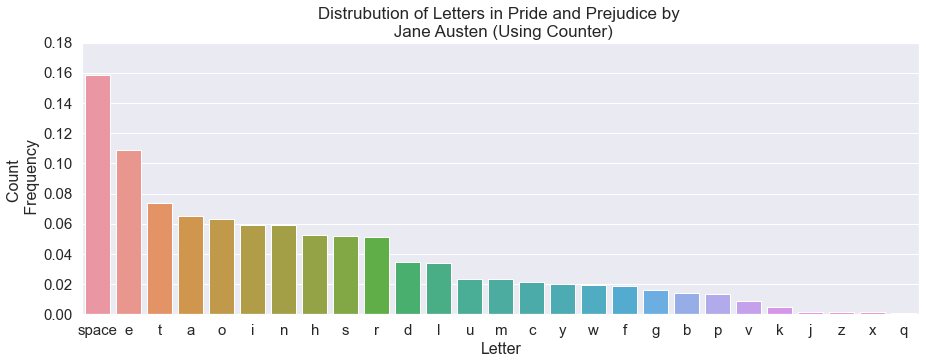

In [7]:
'''
Uses the user defined function to print a histogram of the letter counts. 
'''
graph(x='letter', 
      y='freq', 
      data=df_freq, 
      ylabel='Count \n Frequency', 
      xlabel='Letter', 
      title='Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Counter)')

In [8]:
'''
Applies the user-defined function to produce the k-grams 
from the text and stores the results as a dict in a new column. 
'''
df_clean.loc[:, 'kgrams'] = df_clean['clean_string'].apply(generate_kgram, args=[2])
df_clean.head()

,text,clean_string,clean_string_count,clean_string_count_py,kgrams
0,the project gutenberg ebook of pride and preju...,the project gutenberg ebook of pride and preju...,"{'t': 3, 'h': 1, 'e': 8, ' ': 7, 'p': 3, 'r': ...","{'a': 1, 'b': 2, 'c': 2, 'd': 3, 'e': 8, 'f': ...","{'th': 1, 'he': 1, 'e ': 2, ' p': 3, 'pr': 3, ..."
1,by jane austen,by jane austen,"{'b': 1, 'y': 1, ' ': 2, 'j': 1, 'a': 2, 'n': ...","{'a': 2, 'b': 1, 'c': 0, 'd': 0, 'e': 2, 'f': ...","{'by': 1, 'y ': 1, ' j': 1, 'ja': 1, 'an': 1, ..."
2,this ebook is for the use of anyone anywhere a...,this ebook is for the use of anyone anywhere a...,"{'t': 5, 'h': 4, 'i': 3, 's': 4, ' ': 13, 'e':...","{'a': 4, 'b': 1, 'c': 1, 'd': 1, 'e': 6, 'f': ...","{'th': 3, 'hi': 1, 'is': 2, 's ': 2, ' e': 1, ..."
3,almost no restrictions whatsoever. you may co...,almost no restrictions whatsoever you may copy it,"{'a': 3, 'l': 1, 'm': 2, 'o': 6, 's': 4, 't': ...","{'a': 3, 'b': 0, 'c': 2, 'd': 0, 'e': 3, 'f': ...","{'al': 1, 'lm': 1, 'mo': 1, 'os': 1, 'st': 2, ..."
4,give it away or,give it away or,"{'g': 1, 'i': 2, 'v': 1, 'e': 1, ' ': 3, 't': ...","{'a': 2, 'b': 0, 'c': 0, 'd': 0, 'e': 1, 'f': ...","{'gi': 1, 'iv': 1, 've': 1, 'e ': 1, ' i': 1, ..."


In [9]:
'''
This code summarizes all of the counts from the list of dict and returns a 
final dict that has the final counts of letters in the body of text. 
'''
kgram_list_dict_py = [dict(each) for each in df_clean.kgrams.tolist()]
kgram_dist= {}
for d in kgram_list_dict_py:
    for k in d.keys():
        kgram_dist[k] = kgram_dist.get(k, 0) + d[k]

'''
This code creates a DataFrame containing the kgrams and splits them up
so that we can see the first and second letters of the k-gram as well as 
the counts. 
'''
df_kgram = pd.DataFrame(kgram_dist.items(), columns=['kgram', 'count'])
df_kgram['kgram_len'] = df_kgram['kgram'].str.split(' ').str.len()
two_grams = df_kgram[df_kgram.kgram_len == 1]

two_grams = copy.deepcopy(two_grams)

two_grams.loc[:, 'first_pos'] = two_grams['kgram'].str[0]
two_grams.loc[:, 'second_pos'] = two_grams['kgram'].str[1]

df = two_grams[['kgram', 'count', 'first_pos', 'second_pos']]
df.head()

,kgram,count,first_pos,second_pos
0,th,14098,t,h
1,he,15044,h,e
4,pr,1494,p,r
5,ro,2060,r,o
6,oj,89,o,j


In [10]:
'''
This code creates a square adjacency matrix of the letter occurances found in the text.
'''
df_trans = df.pivot_table(index=['first_pos'], columns='second_pos', values='count')
df_trans['first_pos'] = df_trans.index
df_trans.reset_index(drop=True, inplace=True)
df_reorder = df_trans.reindex(columns=idx_list_2)
df_reorder.head()

second_pos,first_pos,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,a,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,1610.0,...,NaN,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0
1,b,292.0,7.0,NaN,1.0,4290.0,NaN,NaN,7.0,435.0,...,NaN,325.0,156.0,111.0,1144.0,1.0,NaN,NaN,692.0,NaN
2,c,1441.0,1.0,344.0,3.0,2575.0,NaN,NaN,2371.0,551.0,...,100.0,331.0,7.0,1440.0,375.0,NaN,NaN,NaN,509.0,NaN
3,d,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,2019.0,...,1.0,244.0,428.0,21.0,240.0,100.0,22.0,NaN,407.0,NaN
4,e,3165.0,78.0,1802.0,5544.0,1960.0,709.0,333.0,154.0,1087.0,...,198.0,11652.0,3739.0,2624.0,23.0,1430.0,389.0,745.0,1171.0,NaN


In [11]:
'''
This code find the maximum value in each row (letter) and returns the corresponding
letter that represents the highest co-occuring letter in the given the first letter.
As an example, the entry "a": "n" means that for the letter 'a', the most common letter 
that follows is 'n'. These data only includes the 26 letters of the alphabet (no space).

This code fulfills the requirements outlined in 2(c) of the homework instructions.
'''

df_reorder['idxmax'] = df_reorder.iloc[:, 1:-1].idxmax(axis=1)
markov_pred_dict = dict(zip(df_reorder['first_pos'].tolist(), df_reorder['idxmax'].tolist()))
markov_pred_dict

{'a': 'n',
 'b': 'e',
 'c': 'o',
 'd': 'e',
 'e': 'r',
 'f': 'o',
 'g': 'h',
 'h': 'e',
 'i': 'n',
 'j': 'e',
 'k': 'e',
 'l': 'e',
 'm': 'e',
 'n': 'd',
 'o': 'u',
 'p': 'e',
 'q': 'u',
 'r': 'e',
 's': 'e',
 't': 'h',
 'u': 'r',
 'v': 'e',
 'w': 'a',
 'x': 'p',
 'y': 'o',
 'z': 'a'}

In [12]:
'''
Uses the dict showing the most common transistion letter, this code produces a 3,000 character
string starting with the letter 't'.

This code fulfills the requirements outlined in 2(e) of the homework instructions.
'''
markov_string = markov_sampler(char_init='t', n_iter=3000, markov_dict=markov_pred_dict)
markov_string

'hererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererer

In [13]:
'''
This code creates a square adjacency matrix of the letter occurances found
in the text and includes the space.
'''
df_kgram = copy.deepcopy(df_kgram)
df_kgram.loc[:, 'first_pos'] = df_kgram['kgram'].str[0]
df_kgram.loc[:, 'second_pos'] = df_kgram['kgram'].str[1]
df_k = df_kgram[['kgram', 'count', 'first_pos', 'second_pos']]
df_ktrans = df_k.pivot_table(index=['first_pos'], columns='second_pos', values='count')
df_ktrans['first_pos'] = df_ktrans.index
df_ktrans.reset_index(drop=True, inplace=True)
df_ktrans.fillna(0, inplace=True) 

df_ktrans = df_ktrans.reindex(columns=new_col_list).fillna(0)
df_ktrans.rename(columns={' ': 'space'}, inplace=True)
df_ktrans.loc[0, 'first_pos'] = 'space'
df_ktrans['total'] = df_ktrans.iloc[:, 0:].sum(axis=1)
df_ktrans.head()

second_pos,first_pos,space,a,b,c,d,e,f,g,h,...,r,s,t,u,v,w,x,y,z,total
0,space,0.0,10684.0,5187.0,4012.0,3368.0,2701.0,3645.0,1675.0,9233.0,...,2049.0,7289.0,13894.0,894.0,791.0,7469.0,0.0,1915.0,1.0,103750.0
1,a,1981.0,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,...,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0,42456.0
2,b,13.0,292.0,7.0,0.0,1.0,4290.0,0.0,0.0,7.0,...,325.0,156.0,111.0,1144.0,1.0,0.0,0.0,692.0,0.0,9363.0
3,c,78.0,1441.0,1.0,344.0,3.0,2575.0,0.0,0.0,2371.0,...,331.0,7.0,1440.0,375.0,0.0,0.0,0.0,509.0,0.0,14101.0
4,d,11770.0,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,...,244.0,428.0,21.0,240.0,100.0,22.0,0.0,407.0,0.0,20646.0


In [14]:
'''
This code creates a square adjacency matrix of the letter occurances found
in the text and includes the space.
'''
df_ktrans_freq = df_ktrans.iloc[:, 1:].div(df_ktrans['total'] , axis=0)
df_ktrans_freq_2 = df_ktrans_freq.iloc[:, 0:27]
df_ktrans_freq_2['idx'] = idx_list
df_ktrans_freq_2.set_index('idx', inplace=True)

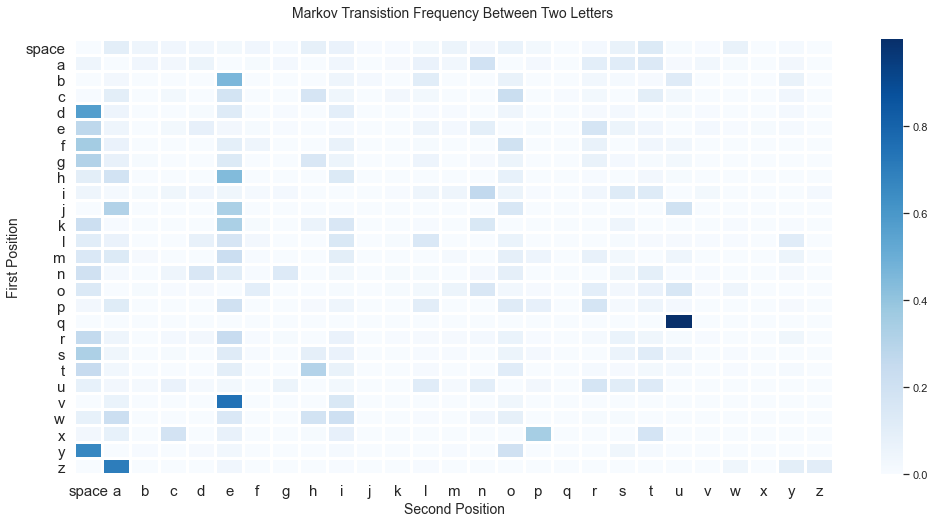

In [15]:
'''
Creates a heatmap using the data in the adjacency matrix that shows
the most common letter transistion in the text.

This code fulfills the requirements outlined in 2(d) of the homework instructions.
'''
sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(df_ktrans_freq_2.iloc[:, 0:27], linewidths=2, yticklabels=1, cmap='Blues')
plt.ylabel('First Position', fontsize=14)
plt.xlabel('Second Position', fontsize=14)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Markov Transistion Frequency Between Two Letters \n', fontsize=14)
plt.show()